In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [26]:
Data=pd.read_csv('Tele_CustomerChurn.csv')
Data

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

Intruduction:-Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models here.

# Exploratory Data Analysis

In [27]:
Data.shape

(3333, 21)

In [28]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

Every Feature Has same Observations i.e. 3333 it means no null value in the DataSet.

In [29]:
#In the Dataset Phone Number has no effect on churn prediction.So we drop Phone number from the dataset
Data=Data.drop('phone number',axis=1)
Data

state  account length  area code international plan voice mail plan  \
0       KS             128        415                 no             yes   
1       OH             107        415                 no             yes   
2       NJ             137        415                 no              no   
3       OH              84        408                yes              no   
4       OK              75        415                yes              no   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 no             yes   
3329    WV              68        415                 no              no   
3330    RI              28        510                 no              no   
3331    CT             184        510                yes              no   
3332    TN              74        415                 no             yes   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6            

Statistical Summary

In [30]:
Data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

# Uni And Bivariate analysis.

In [31]:
#Target Feature
Data.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

The target Feature is in Boolian Values lets assign False as 0 and True as 1 for analysing the Dataset.

In [33]:
Data.churn=Data.churn.astype(str)
Data.churn=Data.churn.replace({'False':0,'True':1})
Data.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [34]:
Data.state.value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
NJ     68
MT     68
NC     68
NV     66
WA     66
CO     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

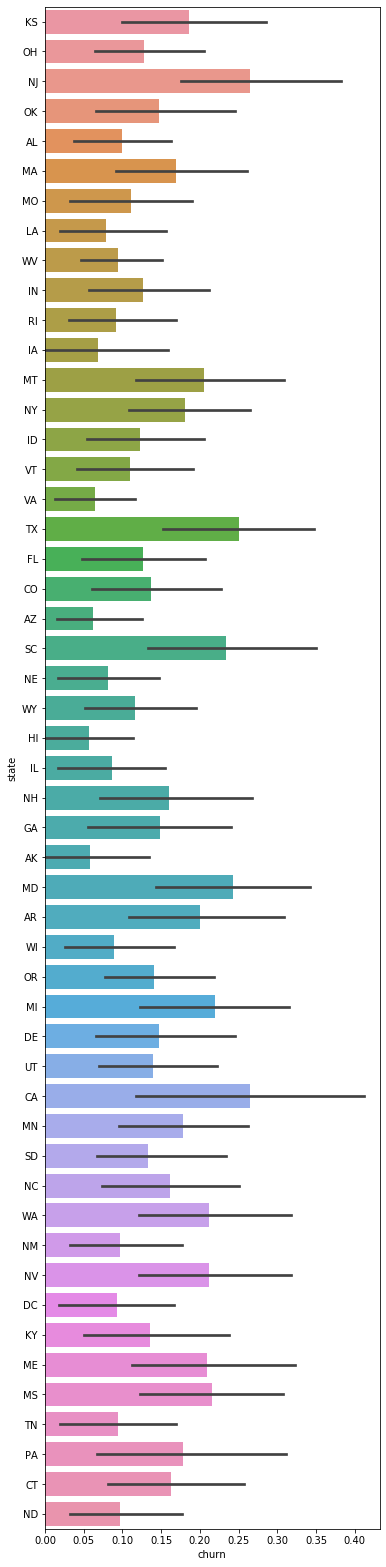

In [40]:
plt.figure(figsize=(6,28))
sns.barplot(x='churn',y='state',data=Data)

states like CA,NJ,TX,SC,WA,NV,ME,PA have high churn rate as comapared to other states.Company has to take care of these states.

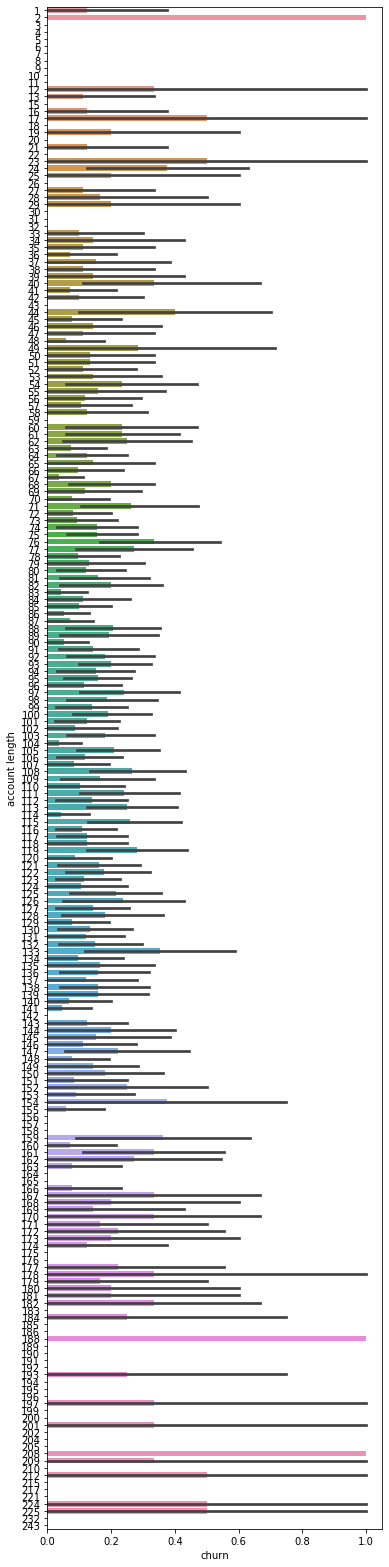

In [54]:
#account length
plt.figure(figsize=(6,28))
sns.barplot(x='churn',y='account length',orient='h',data=Data)

Peoples with less and high account length are more churn rate means new and very old Customer's Churn rate are more as compared to rest customers.

In [57]:
Data['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

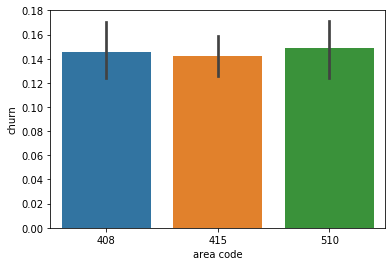

In [58]:
sns.barplot(y='churn',x='area code',data=Data)

Among the 3 types of Area code 415 has heighest number of Customer with lowest churn rate that means the service of company in the 415 area is best so that heigest people associated with less churn.But in 510 and 408 area churn rate is more with less customer so company has to maximize its service to maximize customer number with minimizing churn rate.

In [59]:
#international plan
Data['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

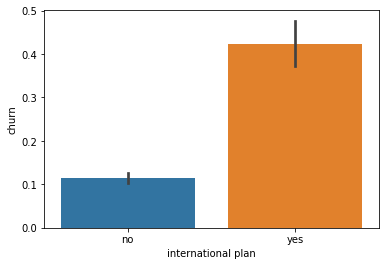

In [60]:
sns.barplot(x='international plan',y='churn',data=Data)

Out of 3333 Customers, only 323 Customers use international plan and this catagory has heigh churn rate.

In [61]:
#voice mail plan
Data['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

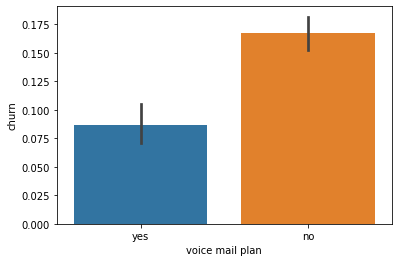

In [62]:
sns.barplot(x='voice mail plan',y='churn',data=Data)

Out of 3333 Customers, only 922 Customers use voice mail plan and this catagory has heigh churn rate.

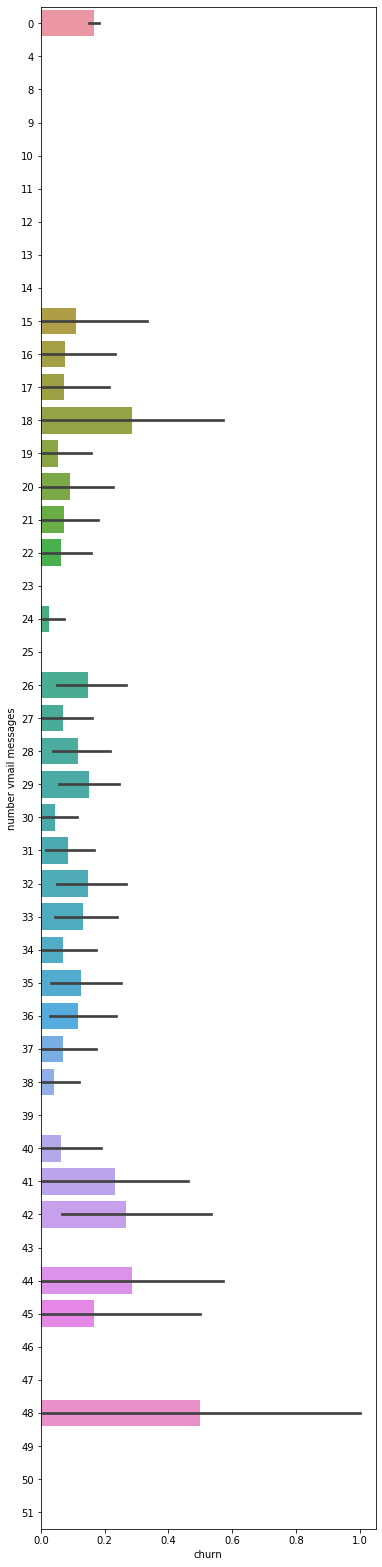

In [63]:
#number vmail messages 
plt.figure(figsize=(6,28))
sns.barplot(x='churn',y='number vmail messages',orient='h',data=Data)

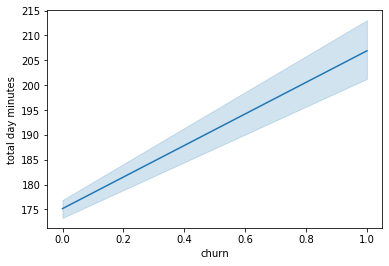

In [68]:
#Total day minute
sns.lineplot(x='churn',y='total day minutes',data=Data)

In [ ]:
Customers using less minutes in a day has low churn but customers using more minutes in a day has heighest churn rate.

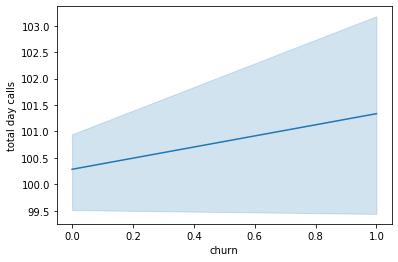

In [69]:
#Total day call
sns.lineplot(x='churn',y='total day calls',data=Data)

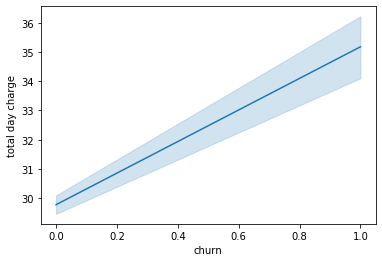

In [70]:
#total day charge
sns.lineplot(x='churn',y='total day charge',data=Data)

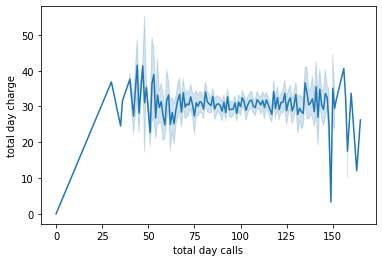

In [71]:
sns.lineplot(x='total day calls',y='total day charge',data=Data)

Customers making calls averagely from 40 to 150 have averagely same total day charge.from 0 to 40 calls per day total charge increases very highly. so Customers giving more charge to company more churn rate.

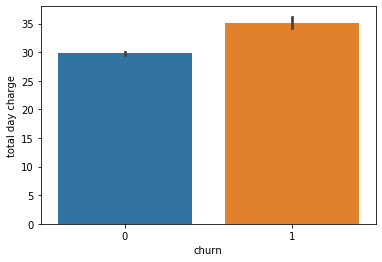

In [72]:
#total day charge
sns.barplot(x='churn',y='total day charge',data=Data)

Customers giving more charge to the comapany have more churn rate.

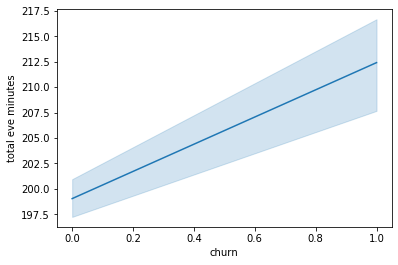

In [74]:
#total eve minutes
sns.lineplot(x='churn',y='total eve minutes',data=Data)

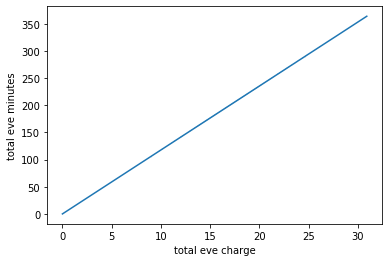

In [75]:
#total eve minutes & total eve charge
sns.lineplot(x='total eve charge',y='total eve minutes',data=Data)

With increase in evening minutes total evening charge increases. So peoples using more evening calls have more churn rate than the people not using evening minutes.

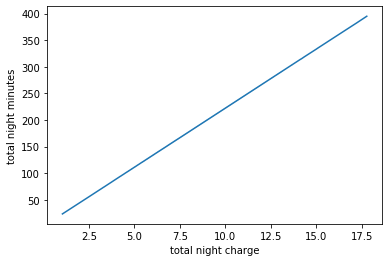

In [78]:
# total night charge & total night minutes
sns.lineplot(x='total night charge',y='total night minutes',data=Data)

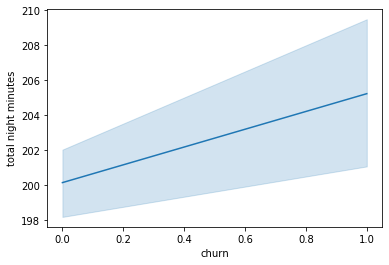

In [79]:
#total night minutes
sns.lineplot(x='churn',y='total night minutes',data=Data)

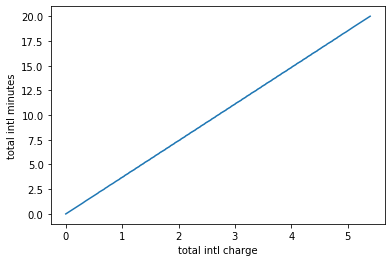

In [80]:
# total night charge & total night minutes
sns.lineplot(x='total intl charge',y='total intl minutes',data=Data)

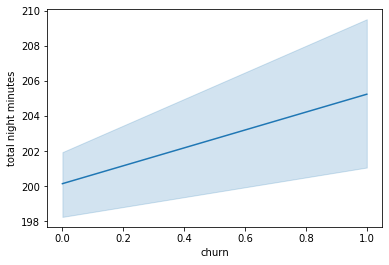

In [81]:
# total night charge & total night minutes
sns.lineplot(x='churn',y='total night minutes',data=Data)

With every type of calls Charges increase linearly.so the churn rate increase. Company have to introduce new unlimited plans so that Customers don't churn.

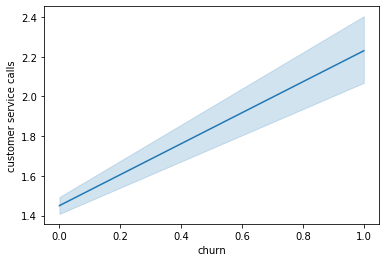

In [82]:
#customer service calls
sns.lineplot(x='churn',y='customer service calls',data=Data)

Cusomers with less service calls have low churn and with increase in service calls churn rate increses.So company has to minimize its service calls.

# Checking for Correlation

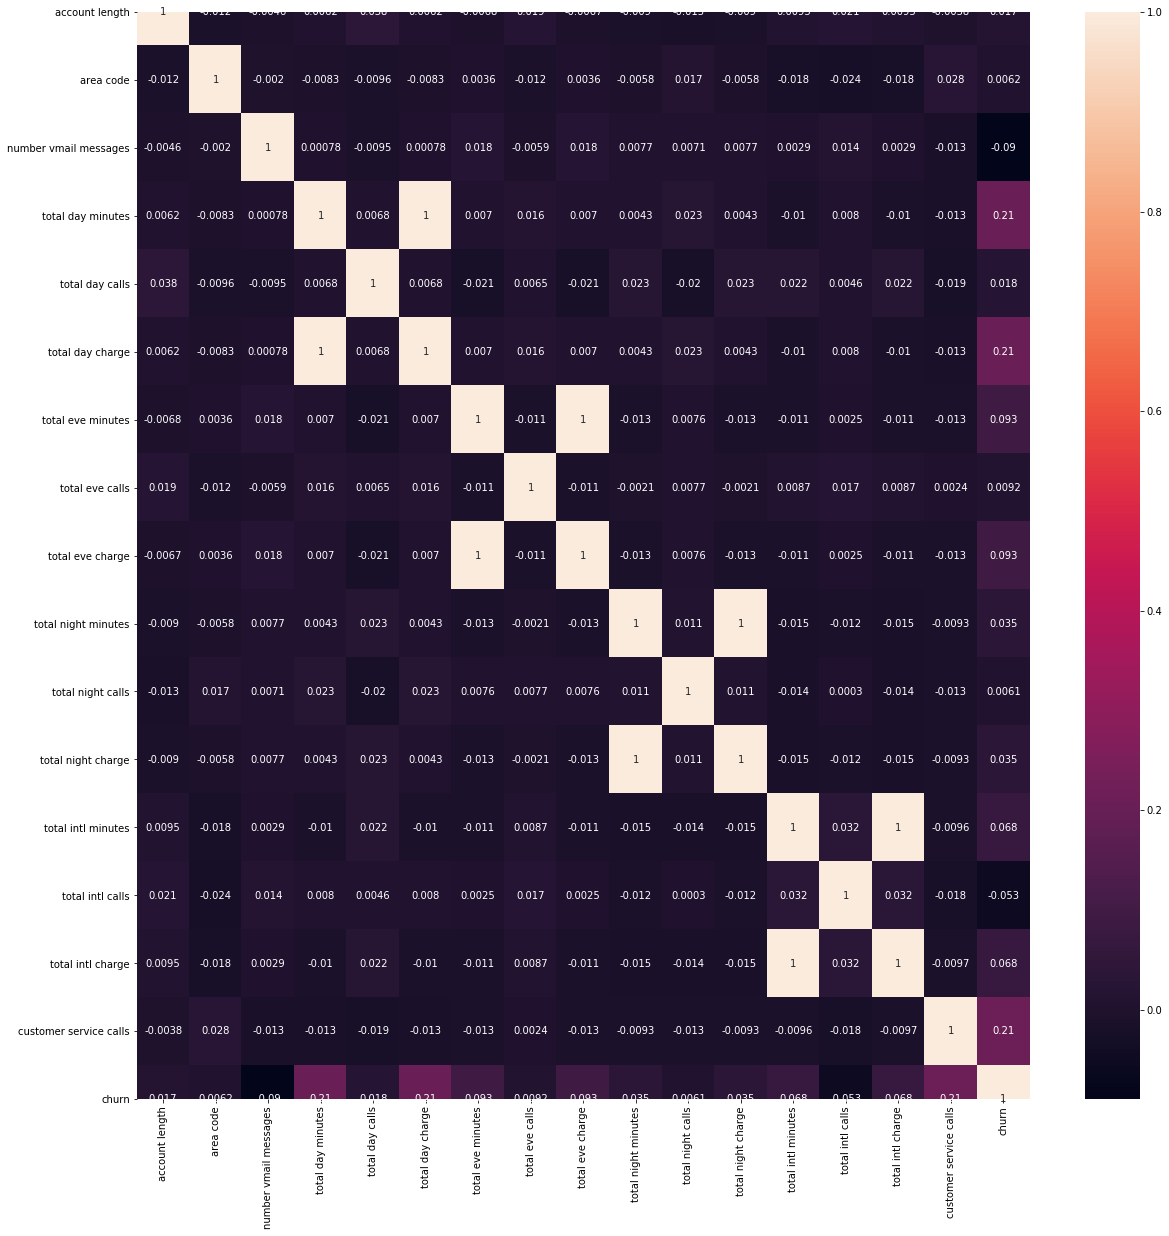

In [84]:
cor=Data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)

Among all the features Total day minute,total day charge,customer service calls have highly positively correlated with churn. 

total day charge,total eve charge,total night charge,total intl charge are 100 percently correlated with total day minute,total eve minute,total night minute,total intl minute respectively.

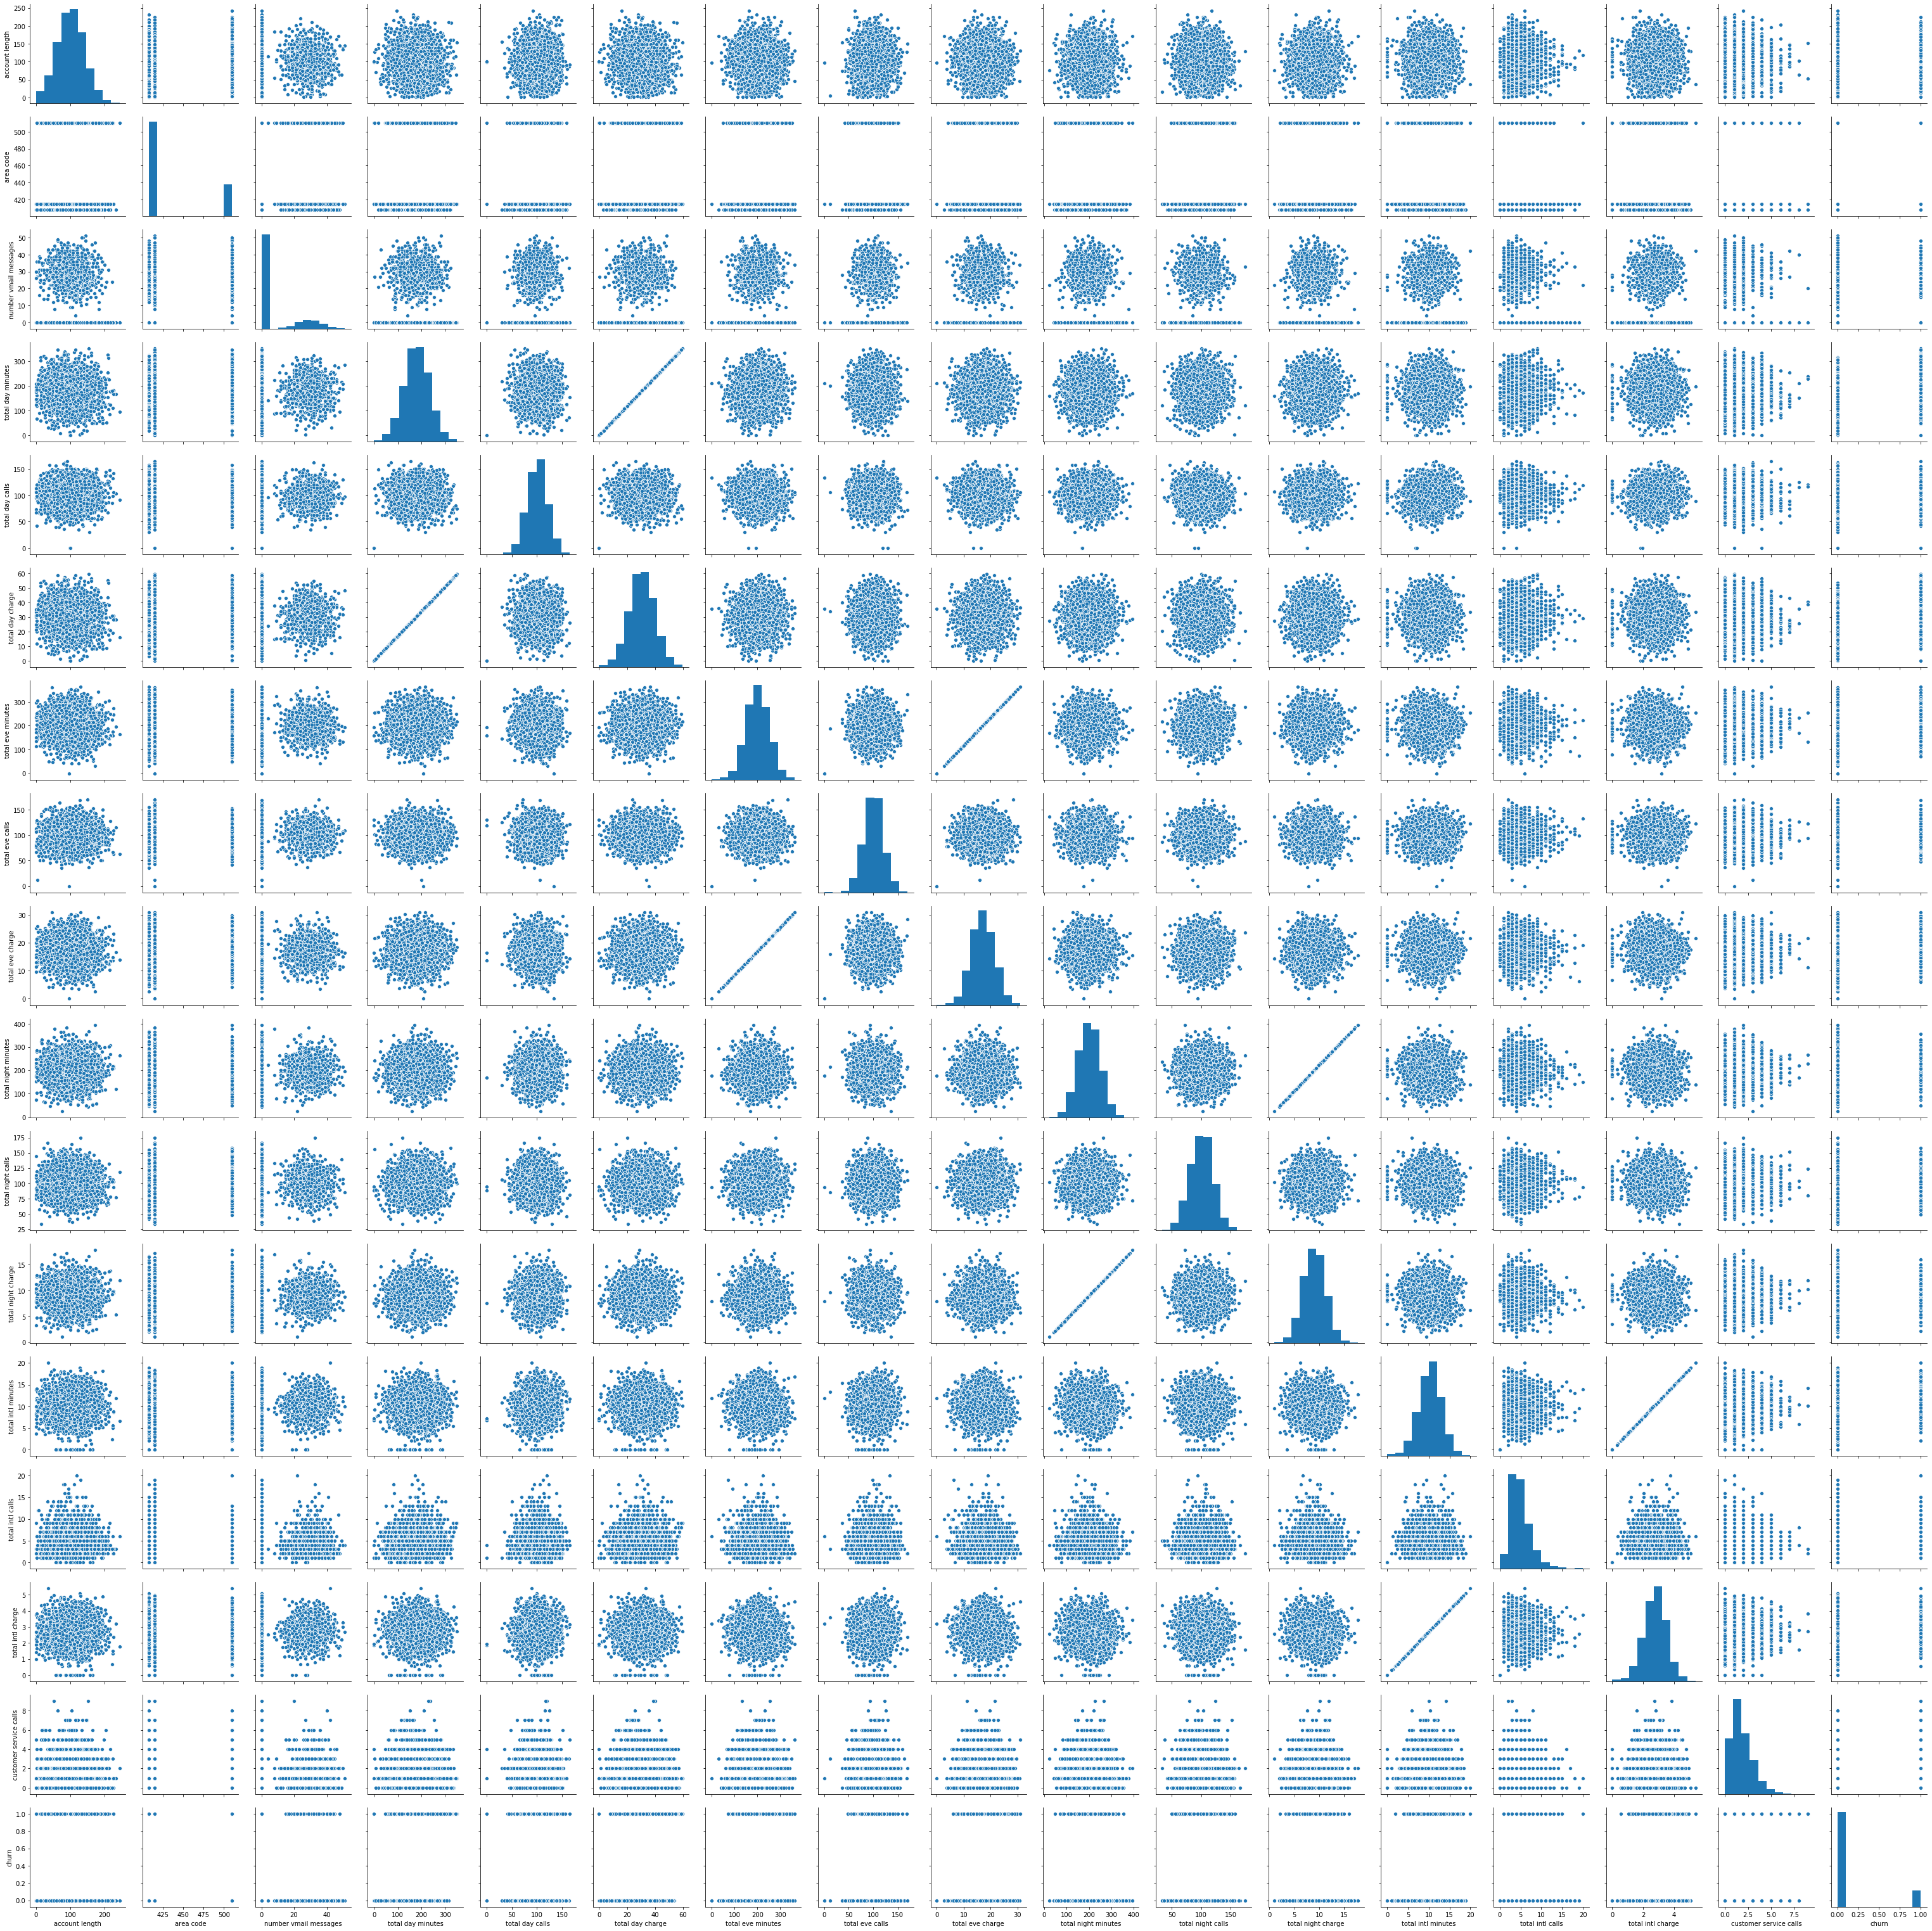

In [85]:
#Plotting Pairplot
sns.pairplot(Data)

# Encoding the categotrical values

In [87]:
list=['state','international plan','voice mail plan']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list:
    Data[i]=le.fit_transform(Data[i])

In [88]:
Data

state  account length  area code  international plan  voice mail plan  \
0        16             128        415                   0                1   
1        35             107        415                   0                1   
2        31             137        415                   0                0   
3        35              84        408                   1                0   
4        36              75        415                   1                0   
...     ...             ...        ...                 ...              ...   
3328      3             192        415                   0                1   
3329     49              68        415                   0                0   
3330     39              28        510                   0                0   
3331      6             184        510                   1                0   
3332     42              74        415                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328               

# Checking for Outliers(Anomoli Detection)

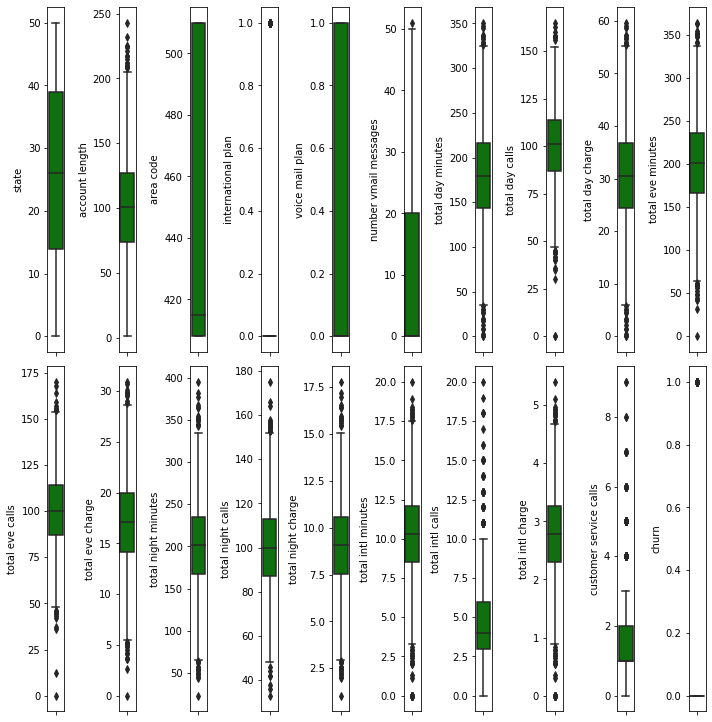

In [96]:
collist=Data.columns
col=20
row=10
plt.figure(figsize=(10,50))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.boxplot(Data[collist[i]],orient='v',color='green')
    plt.tight_layout()

Some outliers avilable in some features.Lets remove them.

In [97]:
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[0.6786493 , 0.67648946, 0.52360328, ..., 0.0856905 , 0.42793202,
        0.41167182],
       [0.6031696 , 0.14906505, 0.52360328, ..., 1.2411686 , 0.42793202,
        0.41167182],
       [0.33331299, 0.9025285 , 0.52360328, ..., 0.69715637, 1.1882185 ,
        0.41167182],
       ...,
       [0.87302621, 1.83505538, 1.71881732, ..., 1.3871231 , 0.33235445,
        0.41167182],
       [1.35329082, 2.08295458, 1.71881732, ..., 1.87695028, 0.33235445,
        0.41167182],
       [1.07541867, 0.67974475, 0.52360328, ..., 1.2411686 , 1.1882185 ,
        0.41167182]])

In [98]:
Data_new=Data[(z<3).all(axis=1)]
Data_new

state  account length  area code  international plan  voice mail plan  \
0        16             128        415                   0                1   
1        35             107        415                   0                1   
2        31             137        415                   0                0   
6        19             121        510                   0                1   
8        18             117        408                   0                0   
...     ...             ...        ...                 ...              ...   
3327     40              79        415                   0                0   
3328      3             192        415                   0                1   
3329     49              68        415                   0                0   
3330     39              28        510                   0                0   
3332     42              74        415                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
6                        24              218.2               88   
8                         0              184.5               97   
...                     ...                ...              ...   
3327                      0              134.7               98   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
6                37.09              348.5              108             29.62   
8                31.37              351.6               80             29.89   
...                ...                ...              ...               ...   
3327             22.90              189.7               68             16.12   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
6                   212.6                118                9.57   
8                   215.8                 90                9.71   
...                   ...                ...                 ...   
3327                221.4                128                9.96   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
6                    7.5                 7               2.03   
8                    8.7                 4               2.35   
...                  ...               ...                ...   
3327               

Checking shapes of Data and Data_new

In [99]:
print(Data.shape)
print(Data_new.shape)

(3333, 20)
(2860, 20)


473 observations are removed as outliers

# Checking for Skewness

In [101]:
Data_new.skew()

state                    -0.061310
account length            0.082671
area code                 1.149801
international plan        0.000000
voice mail plan           1.021156
number vmail messages     1.284367
total day minutes         0.010576
total day calls           0.019286
total day charge          0.010566
total eve minutes        -0.011165
total eve calls          -0.017569
total eve charge         -0.011133
total night minutes      -0.047061
total night calls         0.003426
total night charge       -0.047097
total intl minutes       -0.032943
total intl calls          0.761069
total intl charge        -0.032821
customer service calls    0.723635
churn                     2.497630
dtype: float64

In [102]:
list=['area code','voice mail plan','number vmail messages','total intl calls','churn']
for i in list:
    Data_new[i]=np.sqrt(Data_new[i])

In [103]:
Data_new.skew()

state                    -0.061310
account length            0.082671
area code                 1.147877
international plan        0.000000
voice mail plan           1.021156
number vmail messages     1.098517
total day minutes         0.010576
total day calls           0.019286
total day charge          0.010566
total eve minutes        -0.011165
total eve calls          -0.017569
total eve charge         -0.011133
total night minutes      -0.047061
total night calls         0.003426
total night charge       -0.047097
total intl minutes       -0.032943
total intl calls          0.169178
total intl charge        -0.032821
customer service calls    0.723635
churn                     2.497630
dtype: float64

In [106]:
df_x=Data_new.iloc[:,0:-1]
df_x

state  account length  area code  international plan  voice mail plan  \
0        16             128  20.371549                   0              1.0   
1        35             107  20.371549                   0              1.0   
2        31             137  20.371549                   0              0.0   
6        19             121  22.583180                   0              1.0   
8        18             117  20.199010                   0              0.0   
...     ...             ...        ...                 ...              ...   
3327     40              79  20.371549                   0              0.0   
3328      3             192  20.371549                   0              1.0   
3329     49              68  20.371549                   0              0.0   
3330     39              28  22.583180                   0              0.0   
3332     42              74  20.371549                   0              1.0   

      number vmail messages  total day minutes  total day calls  \
0                  5.000000              265.1              110   
1                  5.099020              161.6              123   
2                  0.000000              243.4              114   
6                  4.898979              218.2               88   
8                  0.000000              184.5               97   
...                     ...                ...              ...   
3327               0.000000              134.7               98   
3328               6.000000              156.2               77   
3329               0.000000              231.1               57   
3330               0.000000              180.8              109   
3332               5.000000              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
6                37.09              348.5              108             29.62   
8                31.37              351.6               80             29.89   
...                ...                ...              ...               ...   
3327             22.90              189.7               68             16.12   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
6                   212.6                118                9.57   
8                   215.8                 90                9.71   
...                   ...                ...                 ...   
3327                221.4                128                9.96   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0          1.732051               2.70   
1                   13.7          1.732051               3.70   
2                   12.2          2.236068               3.29   
6                    7.5          2.645751               2.03   
8                    8.7          2.000000               2.35   
...                  ...               ...                ...   
3327               

In [107]:
y=Data_new.iloc[:,-1].values.reshape(-1,1)
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [109]:
#Scaleing the training dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

state  account length  area code  international plan  \
0    -0.676720        0.691809  -0.513988                 0.0   
1     0.605059        0.162097  -0.513988                 0.0   
2     0.335211        0.918828  -0.513988                 0.0   
3    -0.474333        0.515238   1.735655                 0.0   
4    -0.541795        0.414341  -0.689492                 0.0   
...        ...             ...        ...                 ...   
2855  0.942369       -0.544185  -0.513988                 0.0   
2856 -1.553726        2.306168  -0.513988                 0.0   
2857  1.549527       -0.821653  -0.513988                 0.0   
2858  0.874907       -1.830627   1.735655                 0.0   
2859  1.077293       -0.670306  -0.513988                 0.0   

      voice mail plan  number vmail messages  total day minutes  \
0            1.632993               1.468208           1.596810   
1            1.632993               1.509262          -0.333785   
2           -0.612372              -0.604834           1.192038   
3            1.632993               1.426324           0.721980   
4           -0.612372              -0.604834           0.093371   
...               ...                    ...                ...   
2855        -0.612372              -0.604834          -0.835554   
2856         1.632993               1.882816          -0.434512   
2857        -0.612372              -0.604834           0.962605   
2858        -0.612372              -0.604834           0.024354   
2859         1.632993               1.468208           1.024160   

      total day calls  total day charge  total eve minutes  total eve calls  \
0            0.482058          1.597089          -0.070919        -0.059580   
1            1.145918         -0.334065          -0.109065         0.142915   
2            0.686322          1.192205          -1.600768         0.497281   
3           -0.641398          0.721486           2.962678         0.396034   
4           -0.181803          0.093861           3.024916        -1.021432   
...               ...               ...                ...              ...   
2855        -0.130737         -0.835507          -0.225510        -1.628917   
2856        -1.203126         -0.435012           0.292470         1.307261   
2857        -2.224450          0.962880          -0.954297        -2.287025   
2858         0.430991          0.024734           1.764096        -2.135154   
2859         0.635256          1.024326           1.304338        -0.920184   

      total eve charge  total night minutes  total night calls  \
0            -0.070733             0.871893          -0.461169   
1            -0.108524             1.066993           0.157424   
2            -1.601293            -0.779424           0.208973   
3             2.962043             0.226250           0.930665   
4             3.025816             0.290613          -0.512718   
...                ...                  ...                ...   
2855         -0.226623             0.403249           1.446159   
2856          0.293011             1.563796          -0.873564   
2857         -0.954112            -0.202167           1.188412   
2858          1.764522            -0.190099          -0.461169   
2859          1.303937             0.805518          -1.182861   

      total night charge  total intl minutes  total intl calls  \
0               0.871170           -0.104408         -0.571076   
1               1.067832            1.278720         -0.571076   
2              -0.778109            0.717993          0.410332   
3               0.227549           -1.038954          1.208056   
4               0.290123           -0.590372         -0.049333   
...                  ...                 ...               ...   
2855            0.401863            0.568465          0.410332   
2856            1.563957           -0.141790          0.825901   
2857           -0.201532           -0.253935         -0.049333   
2858           -0.188

# Machine Learning

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
max_acc_scr=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.25)
    lr=LogisticRegression()
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    acc_scr=accuracy_score(test_y,pred)
    if acc_scr>max_acc_scr:
        max_acc_scr=acc_scr
        final_r_state=r_state
    print('Max accuracy score corresponding to ',final_r_state,' is ',max_acc_scr)    

Max accuracy score corresponding to  42  is  0.9034965034965035
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43  is  0.9314685314685315
Max accuracy score corresponding to  43 

In [115]:
#Checking if the model is ovre or underfitted
a_score=cross_val_score(lr,x,y,cv=5,scoring='accuracy')
print(a_score)
print(np.mean(a_score))

[0.90052356 0.90034965 0.8986014  0.8951049  0.90367776]
0.8996514525168214


In [117]:
#final Logistic Regression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=43,test_size=0.25)
lr=LogisticRegression()
lr.fit(train_x,train_y)
lrpred=lr.predict(test_x)
print('Predicted Churn',lrpred)

Predicted Churn [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [118]:
print('Accuracy Score ',accuracy_score(lrpred,test_y))
print('Confusion Matrix \n',confusion_matrix(lrpred,test_y))
print('Classification Report \n',classification_report(lrpred,test_y))

Accuracy Score  0.9314685314685315
Confusion Matrix 
 [[649  42]
 [  7  17]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       691
         1.0       0.29      0.71      0.41        24

    accuracy                           0.93       715
   macro avg       0.64      0.82      0.69       715
weighted avg       0.97      0.93      0.95       715



# Checking the accuracy by other algorithms

In [119]:
from sklearn.svm import SVC
sv=SVC()
param={'kernel':['rbf','linear','poly']}
gd_sr=GridSearchCV(estimator=sv,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'kernel': 'rbf'}
0.9333333333333333


In [120]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dt,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'criterion': 'entropy'}
0.9114219114219114


In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
param={'n_neighbors':[50,100,150,200,250,300,350,400]}
gd_sr=GridSearchCV(estimator=knn,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'n_neighbors': 50}
0.8876456876456876


In [125]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(train_x,train_y)
gnpred=gnb.predict(test_x)
print('Predicted Churn',gnpred)

Predicted Churn [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [126]:
print('Accuracy Score ',accuracy_score(gnpred,test_y))
print('Confusion Matrix \n',confusion_matrix(gnpred,test_y))
print('Classification Report \n',classification_report(gnpred,test_y))

Accuracy Score  0.9048951048951049
Confusion Matrix 
 [[619  31]
 [ 37  28]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       650
         1.0       0.47      0.43      0.45        65

    accuracy                           0.90       715
   macro avg       0.71      0.69      0.70       715
weighted avg       0.90      0.90      0.90       715



# Checking the accuracy Score by ensemble methods

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
param={'n_estimators':[50,100,150,200,250,300,350,400]}
gd_sr=GridSearchCV(estimator=rf,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'n_estimators': 50}
0.9454545454545454


In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
param={'n_estimators':[50,100,150,200,250,300,350,400]}
gd_sr=GridSearchCV(estimator=gbc,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'n_estimators': 400}
0.9440559440559441


From all the models Accuracy score of RandomForestRegressior is heighest i.e 0.9454545454545454(94.54%) so we save this model for production.

In [129]:
#Final Model
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(train_x,train_y)
rfcpred=rfc.predict(test_x)
print('Predicted Churn',rfcpred)

Predicted Churn [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [130]:
print('Accuracy Score ',accuracy_score(rfcpred,test_y))
print('Confusion Matrix \n',confusion_matrix(rfcpred,test_y))
print('Classification Report \n',classification_report(rfcpred,test_y))

Accuracy Score  0.9664335664335665
Confusion Matrix 
 [[653  21]
 [  3  38]]
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       674
         1.0       0.64      0.93      0.76        41

    accuracy                           0.97       715
   macro avg       0.82      0.95      0.87       715
weighted avg       0.98      0.97      0.97       715



In [132]:
test1=np.array([31,137,20.371549,0.0,0.000000,1,5,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,2.236068,3.29]).reshape(1,-1)
rfc.predict(test1)

array([1.])

In [133]:
test2=np.array([5,37,9,1,5.300,3,1,543,4,1,1.2,10,10,16,14,72,12,2,3]).reshape(1,-1)
rfc.predict(test2)

array([0.])

In [134]:
#Saving the prediction in csv file
df=pd.DataFrame(rfcpred)
df.to_csv('Predicted_Tele_churn.csv')

In [135]:
#Saving the model for Production
from sklearn.externals import joblib
joblib.dump(rfc,'Predicted_Tele_churn.obj')

['Predicted_Tele_churn.obj']